<a href="https://colab.research.google.com/github/devadethan452/ICT.DSA.DEVADETH/blob/main/AN_VIDYA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **train data**

In [168]:
data = pd.read_csv("/content/drive/MyDrive/DSA DATASETS/train_LZdllcl (1).csv")

In [169]:
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [170]:
data.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [171]:
data.isna().sum()

,0
employee_id,0
department,0
region,0
education,2409
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,4124
length_of_service,0


In [172]:
data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [173]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [174]:
data['education'] = data['education'].fillna(data['education'].mode()[0])

In [175]:
data['previous_year_rating']=data['previous_year_rating'].fillna(data['previous_year_rating'].median())

In [176]:
numeric_data = data.select_dtypes(include=np.number)

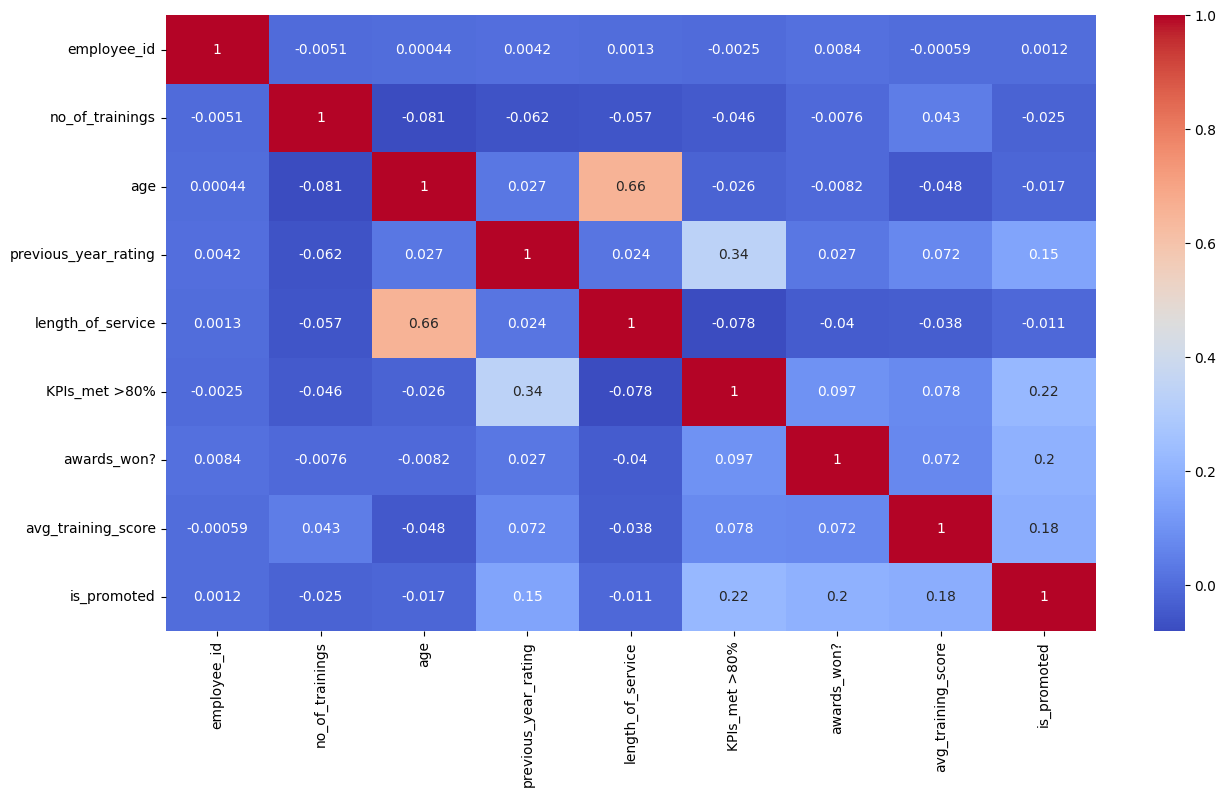

In [177]:
numeric_data = data.select_dtypes(include=np.number)
corr_matrix = numeric_data.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


In [178]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['education'] = le.fit_transform(data['education'])
data['gender'] = le.fit_transform(data['gender'])
data['department']=le.fit_transform(data['department'])

In [179]:
data.drop(['employee_id','region','recruitment_channel'],axis=1, inplace=True)

In [180]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [181]:
scaled_data

array([[ 0.80893285,  1.61975831, -1.53622276, ..., -0.15401776,
        -1.07593145, -0.30512181],
       [-0.38818322, -0.62883817,  0.65094726, ..., -0.15401776,
        -0.25328242, -0.30512181],
       [ 0.80893285, -0.62883817,  0.65094726, ..., -0.15401776,
        -1.00114517, -0.30512181],
       ...,
       [-1.98433798, -0.62883817,  0.65094726, ..., -0.15401776,
         1.1676568 , -0.30512181],
       [ 0.80893285, -0.62883817,  0.65094726, ..., -0.15401776,
        -1.37507655, -0.30512181],
       [-1.1862606 , -0.62883817,  0.65094726, ..., -0.15401776,
        -1.07593145, -0.30512181]])

In [182]:
scaled_data = pd.DataFrame(scaled_data, columns=data.columns)

In [183]:
scaled_data

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,0.808933,1.619758,-1.536223,-0.415276,0.025598,1.395766,0.500460,1.356878,-0.154018,-1.075931,-0.305122
1,-0.388183,-0.628838,0.650947,-0.415276,-0.627135,1.395766,-0.437395,-0.736986,-0.154018,-0.253282,-0.305122
2,0.808933,-0.628838,0.650947,-0.415276,-0.104948,-0.250651,0.265996,-0.736986,-0.154018,-1.001145,-0.305122
3,0.808933,-0.628838,0.650947,1.226063,0.547785,-1.897069,0.969387,-0.736986,-0.154018,-1.001145,-0.305122
4,1.207972,-0.628838,0.650947,-0.415276,1.331064,-0.250651,-0.906322,-0.736986,-0.154018,0.718939,-0.305122
...,...,...,...,...,...,...,...,...,...,...,...
54803,1.207972,-0.628838,0.650947,-0.415276,1.722704,-0.250651,2.610632,-0.736986,-0.154018,1.092871,-0.305122
54804,-0.388183,1.619758,-1.536223,-0.415276,0.286691,-1.073860,0.031532,-0.736986,-0.154018,-0.552428,-0.305122
54805,-1.984338,-0.628838,0.650947,-0.415276,-1.018775,1.395766,-0.671858,1.356878,-0.154018,1.167657,-0.305122
54806,0.808933,-0.628838,0.650947,-0.415276,-0.757681,-1.897069,-0.906322,-0.736986,-0.154018,-1.375077,-0.305122


In [184]:
x = data.drop('is_promoted',axis=1)
y = data['is_promoted']

In [185]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [186]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [187]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score
y_pred = lr.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

0.9168035030103996
[[9957   97]
 [ 815   93]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.96     10054
           1       0.49      0.10      0.17       908

    accuracy                           0.92     10962
   macro avg       0.71      0.55      0.56     10962
weighted avg       0.89      0.92      0.89     10962

0.5463875030780919


In [188]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)
y_pred1 = nb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(classification_report(y_test,y_pred1))
print(roc_auc_score(y_test,y_pred1))


0.9151614668856048
[[9915  139]
 [ 791  117]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     10054
           1       0.46      0.13      0.20       908

    accuracy                           0.92     10962
   macro avg       0.69      0.56      0.58     10962
weighted avg       0.89      0.92      0.89     10962

0.5575146412018274


In [189]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred2 = dt.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))
print(roc_auc_score(y_test,y_pred2))

0.9009304871373837
[[9468  586]
 [ 500  408]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.95     10054
           1       0.41      0.45      0.43       908

    accuracy                           0.90     10962
   macro avg       0.68      0.70      0.69     10962
weighted avg       0.91      0.90      0.90     10962

0.695526973725144


In [190]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred3 = rf.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(classification_report(y_test,y_pred3))
print(roc_auc_score(y_test,y_pred3))


0.9325852946542602
[[9916  138]
 [ 601  307]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     10054
           1       0.69      0.34      0.45       908

    accuracy                           0.93     10962
   macro avg       0.82      0.66      0.71     10962
weighted avg       0.92      0.93      0.92     10962

0.6621899233127894


In [191]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train,y_train)
y_pred4 = svm.predict(x_test)
print(accuracy_score(y_test,y_pred4))
print(confusion_matrix(y_test,y_pred4))
print(classification_report(y_test,y_pred4))
print(roc_auc_score(y_test,y_pred4))

0.9171683999270206
[[10054     0]
 [  908     0]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     10054
           1       0.00      0.00      0.00       908

    accuracy                           0.92     10962
   macro avg       0.46      0.50      0.48     10962
weighted avg       0.84      0.92      0.88     10962

0.5


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [192]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred5 = knn.predict(x_test)
print(accuracy_score(y_test,y_pred5))
print(confusion_matrix(y_test,y_pred5))
print(classification_report(y_test,y_pred5))
print(roc_auc_score(y_test,y_pred5))


0.9285714285714286
[[9974   80]
 [ 703  205]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     10054
           1       0.72      0.23      0.34       908

    accuracy                           0.93     10962
   macro avg       0.83      0.61      0.65     10962
weighted avg       0.92      0.93      0.91     10962

0.6089069465415391


In [193]:
Accuracy = pd.DataFrame({'Model':['Logistic Regression','Naive Bayes','Decision Tree','Random Forest','Support Vector Machine','KNN'],'Accuracy':[accuracy_score(y_test,y_pred),accuracy_score(y_test,y_pred1),accuracy_score(y_test,y_pred2),accuracy_score(y_test,y_pred3),accuracy_score(y_test,y_pred4),accuracy_score(y_test,y_pred5)]})


In [194]:
other_data =  pd.DataFrame({'Model': ['Logistic Regression', 'Naive Bayes', 'Random Forest', 'Decision Tree', 'SVM', 'KNN']})
merged_data = pd.merge(Accuracy,other_data, on='Model')

In [195]:
merged_data

,Model,Accuracy
0,Logistic Regression,0.916804
1,Naive Bayes,0.915161
2,Decision Tree,0.900930
3,Random Forest,0.932585
4,KNN,0.928571


# **test data**

In [196]:
data1 = pd.read_csv('/content/drive/MyDrive/DSA DATASETS/test_2umaH9m (1).csv')

In [197]:
data1.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [198]:
data1.isna().sum()

,0
employee_id,0
department,0
region,0
education,1034
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,1812
length_of_service,0


In [199]:
data1['education']=data1['education'].fillna(data1['education'].mode()[0])


data1['previous_year_rating'] = data1['previous_year_rating'].fillna(data1['previous_year_rating'].median())


data1.isnull().sum()

,0
employee_id,0
department,0
region,0
education,0
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,0
length_of_service,0


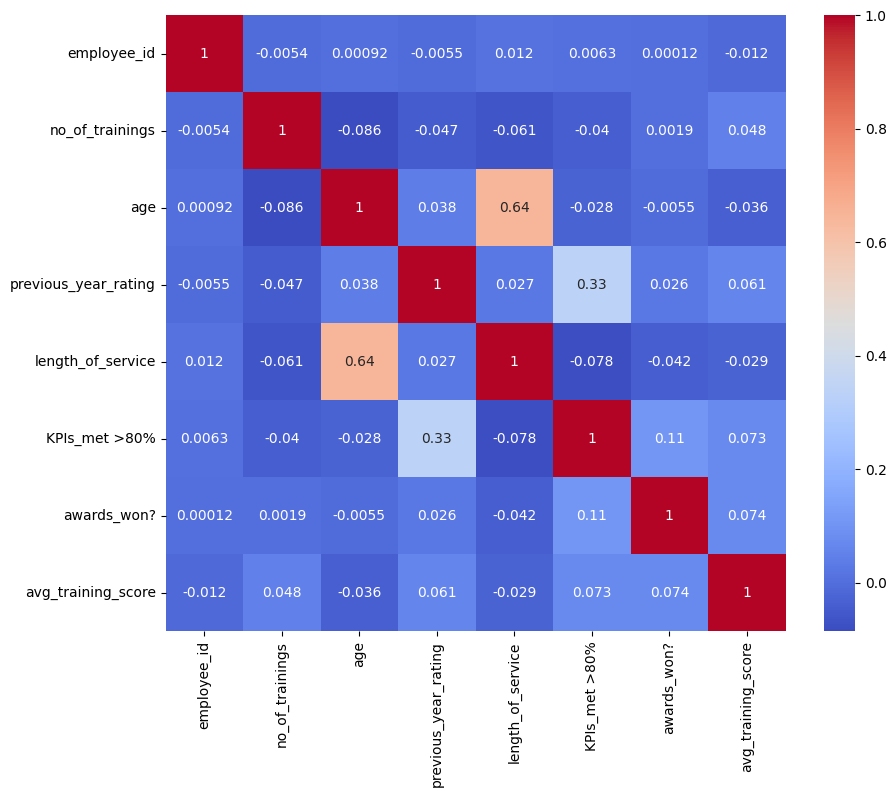

In [200]:
numeric_data1 = data1.select_dtypes(include=np.number)
corr_matrix = numeric_data1.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [201]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data1['education'] = le.fit_transform(data1['education'])
data1['gender'] = le.fit_transform(data1['gender'])
data1['department']=le.fit_transform(data1['department'])


In [202]:
data_1=data1.drop(['employee_id','region','recruitment_channel'],axis=1)

In [203]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data1 = scaler.fit_transform(data_1)

In [204]:
scaled_data1 = pd.DataFrame(scaled_data1, columns=data_1.columns)

In [205]:
scaled_data1

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,1.206058,-0.637366,0.644516,-0.423094,-1.404150,-0.257191,-1.143200,1.336715,-0.152665,1.024263
1,-1.180154,-0.637366,-1.551551,-0.423094,-0.492612,-0.257191,-0.192590,-0.748103,-0.152665,-0.914377
2,0.808356,-0.637366,0.644516,-0.423094,-0.492612,-1.900667,-0.430243,-0.748103,-0.152665,-1.212629
3,0.012952,-0.637366,-1.551551,2.905264,-0.492612,-1.078929,0.758019,-0.748103,-0.152665,0.129506
4,-1.577856,-0.637366,0.644516,-0.423094,-0.622832,0.564547,0.282714,-0.748103,-0.152665,-0.168746
...,...,...,...,...,...,...,...,...,...,...
23485,-0.782452,0.481430,0.644516,-0.423094,-1.404150,-0.257191,-1.143200,-0.748103,-0.152665,-0.168746
23486,1.206058,-0.637366,0.644516,-0.423094,-0.492612,-0.257191,0.282714,-0.748103,-0.152665,0.800574
23487,-1.180154,-0.637366,-1.551551,-0.423094,-1.143711,0.564547,-0.430243,-0.748103,-0.152665,-0.988940
23488,0.012952,-0.637366,0.644516,2.905264,-1.013491,-0.257191,-1.143200,-0.748103,-0.152665,0.502321


In [206]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred6 = rf.predict(scaled_data1)
y_pred6

array([0, 0, 0, ..., 0, 0, 0])

In [207]:
data2 = pd.read_csv('/content/drive/MyDrive/DSA DATASETS/sample_submission_M0L0uXE (1).csv')

In [208]:
data2

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0
...,...,...
23485,53478,0
23486,25600,0
23487,45409,0
23488,1186,0


In [209]:
data2['is_promoted'] = y_pred6

In [210]:
sample_submission = data2

In [211]:
sample_submission

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0
...,...,...
23485,53478,0
23486,25600,0
23487,45409,0
23488,1186,0


In [213]:
sample_submission.to_csv('sample_submission.csv', index=False)